In [1]:
# kaggle website link: https://www.kaggle.com/c/bike-sharing-demand

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from sklearn.dummy import DummyRegressor

In [3]:
train_data = pd.read_csv("./Data/train.csv")
test_data = pd.read_csv("./Data/test.csv")

In [4]:
train_data.shape, test_data.shape

((10886, 12), (6493, 9))

### Inspecting train and test data columns for irregularities

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### There are no nulls in the dataset so no manipulation needed for this step

In [7]:
train_data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### There is no casual and registered columns in the test data. It seems adding those columns together will equal the count column. Will check to confirm. If so, columns will be dropped.

In [8]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train_data['count_check'] = train_data['casual'] + train_data['registered']
train_data['count'].equals(train_data['count_check'])

True

### The casual and registered columns equal the count so will drop those columns and the count_check column

In [10]:
train_data = train_data.drop(columns=['casual', 'registered', 'count_check'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


### Since the train and test data were split by the days of the month (train data is from the 1st to the 19th and the test data is from the 20th to the end of the month.) The date can can be dropped from the datetime column. Three new columns will be create a 'month', 'hour', 'week #' and 'day of the week' column.

In [11]:
# convert to column to datetime
train_data['datetime'] = pd.to_datetime(train_data['datetime'])

In [22]:
train_data['month'] = pd.DatetimeIndex(train_data['datetime']).month
train_data['hour'] = pd.DatetimeIndex(train_data['datetime']).hour
train_data['dayofweek'] = pd.DatetimeIndex(train_data['datetime']).dayofweek
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  Month       10886 non-null  period[M]     
 11  month       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  year        10886 non-null  int64         
 14  dayofweek   10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10), period[M](1)
memory usage

In [23]:
train_data['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

In [24]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Month,month,hour,year,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011-01,1,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011-01,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011-01,1,2,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011-01,1,3,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011-01,1,4,2011,5


In [8]:
#  'count' = number of total rentals
y = train_data['count']

cat_cols = ['season', 'holiday', 'workingday', 'weather', ]

cont_cols = ['datetime', 'temp', ' atemp', 'humidity', 'windspeed']

In [9]:
#value_counts cell
train_data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [10]:
# examine datetime colum to determine 
# whether to list it as categorical or continuous

# convert to column to datetime
train_data['datetime'] = pd.to_datetime(train_data['datetime'])

In [11]:
# there are enough unique values to consider the column a continuous

len(train_data['datetime'].unique())

10886

Skewness = 1.241895058803035
Kurtosis = 1.2989447727380323


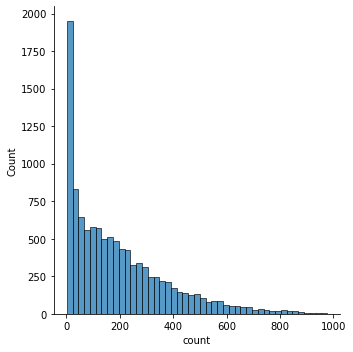

In [14]:
#checking distribution of y
sns.displot(y);

print ('Skewness =', skew(y))
print ('Kurtosis =', kurtosis(y))

In [ ]:
# A skewness smaller than -1 (negatively skewed) 
# or bigger than 1 (positively skewed) 
# means that the data are highly skewed.




In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)

dummy_regr.predict(X)

dummy_regr.score(X, y)